In [46]:
import pandas as pd
import numpy as np

%store -r BZNO2NSLDA2021Daily
BZNO2NSLDA2021Daily

,Day,Daily DA
0,01.01.2021 00:00 - 01.01.2021 01:00,NaN
1,02.01.2021 00:00 - 02.01.2021 01:00,NaN
2,03.01.2021 00:00 - 03.01.2021 01:00,NaN
3,04.01.2021 00:00 - 04.01.2021 01:00,NaN
4,05.01.2021 00:00 - 05.01.2021 01:00,NaN
...,...,...
360,27.12.2021 00:00 - 27.12.2021 01:00,210.17
361,28.12.2021 00:00 - 28.12.2021 01:00,169.01
362,29.12.2021 00:00 - 29.12.2021 01:00,174.78
363,30.12.2021 00:00 - 30.12.2021 01:00,120.36


In [47]:
%store -r BZNO2NSLDA2022Daily
BZNO2NSLDA2022Daily

,Day,Daily DA
0,01.01.2022 00:00 - 01.01.2022 01:00,121.31
1,02.01.2022 00:00 - 02.01.2022 01:00,103.00
2,03.01.2022 00:00 - 03.01.2022 01:00,119.56
3,04.01.2022 00:00 - 04.01.2022 01:00,149.98
4,05.01.2022 00:00 - 05.01.2022 01:00,141.28
...,...,...
360,27.12.2022 00:00 - 27.12.2022 01:00,140.15
361,28.12.2022 00:00 - 28.12.2022 01:00,126.03
362,29.12.2022 00:00 - 29.12.2022 01:00,75.53
363,30.12.2022 00:00 - 30.12.2022 01:00,78.15


In [48]:
BZNO2NSL = pd.concat([BZNO2NSLDA2021Daily["Daily DA"], BZNO2NSLDA2022Daily["Daily DA"]], ignore_index=True).to_frame("BZN|NO2NSL")

BZNO2NSL["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "BZN|NO2NSL"]

#BZGBDAdata["Date"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
BZNO2NSL = BZNO2NSL.reindex(columns=NewOrder)

BZNO2NSL

,Date,BZN|NO2NSL
0,2021-01-01,NaN
1,2021-01-02,NaN
2,2021-01-03,NaN
3,2021-01-04,NaN
4,2021-01-05,NaN
...,...,...
725,2022-12-27,140.15
726,2022-12-28,126.03
727,2022-12-29,75.53
728,2022-12-30,78.15


(18878.2, 19379.8)


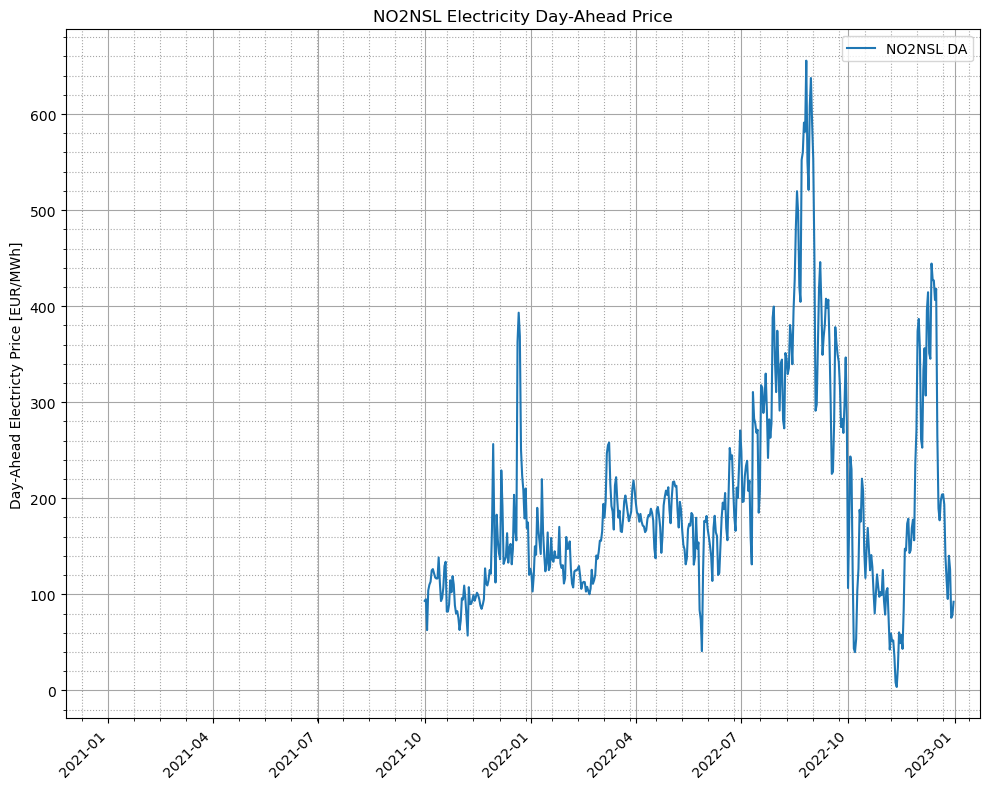

In [50]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
  
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('NO2NSL Electricity Day-Ahead Price')
plt.ylabel('Day-Ahead Electricty Price [EUR/MWh]')

ax.plot(BZNO2NSL["Date"], BZNO2NSL["BZN|NO2NSL"], label="NO2NSL DA")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#n = 30
#ax.xaxis.set_minor_locator(plt.MultipleLocator(n-3))
#ax.xaxis.set_major_locator(plt.MultipleLocator(n))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18591.55, 19379.8)
plt.tight_layout()

plt.show()